In [50]:
#워닝 메시지
import warnings
warnings.filterwarnings('ignore')


# 1. linearRegression

> sklearn.linear_model.LinearRegression

- class sklearn.linear_model.LinearRegression(*, fit_intercept=True, copy_X=True, n_jobs=None, positive=False)
- 최소 제곱법을 이용해서 회귀계수 추정

#### 파라미터 (Parameters):

- fit_intercept (bool, 기본값=True):이 모델의 절편(intercept)을 계산할지 여부를 나타냅니다. False로 설정하면 계산에서 절편을 사용하지 않습니다 (즉, 데이터가 중심화(centered)되었다고 가정합니다).
- copy_X (bool, 기본값=True):True인 경우 X를 복사하고, False인 경우 X를 덮어쓸 수 있습니다.
- n_jobs (int, 기본값=None):계산에 사용할 작업 스레드(thread)의 수를 지정합니다. None은 1을 의미하며, -1은 모든 프로세서를 사용합니다. 
- positive (bool, 기본값=False):rue로 설정하면 계수(coefficients)를 양수로 강제합니다. 이 옵션은 밀집(dense) 배열에 대해서만 지원됩니다.

#### 어트리뷰트 (Attributes):

- coef_ (배열, 형태: (n_features, ) 또는 (n_targets, n_features)):선형 회귀 문제에 대한 추정된 계수입니다. fit 시에 여러 개의 타겟이 전달되면 (y가 2D인 경우) (n_targets, n_features) 형태의 2D 배열로 반환되며, 하나의 타겟만 전달된 경우 (n_features, ) 형태의 1D 배열로 반환됩니다.
- rank_ (정수):행렬 X의 랭크(rank)입니다. X가 밀집(dense)일 때만 사용 가능합니다.
- singular_ (배열, 형태: (min(X, y),)):행렬 X의 특이값(singular values)입니다. X가 밀집(dense)일 때만 사용 가능합니다.
- intercept_ (실수 또는 형태: (n_targets,)):선형 모델의 독립 항(independent term)입니다. fit_intercept가 False로 설정된 경우 0.0으로 설정됩니다.
- n_features_in (정수):fit 시에 관찰된 특성(feature)의 수입니다.


In [51]:
import pandas as pd
import numpy as np

boston_df=pd.read_csv('../datasets/boston.csv',index_col=0)
boston_df

,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
CRIM,,,,,,,,,,,,,
0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9


In [52]:
## 스케일링
from sklearn.preprocessing import StandardScaler

y_target=boston_df['Price'].values.reshape(-1,1)
X_data= boston_df.drop('Price',axis=1)

scaler=StandardScaler()
scaler2=StandardScaler()

scaler.fit(X_data)
X_data_scaler= scaler.transform(X_data) 

scaler2.fit(y_target)
y_data_scaler= scaler2.transform(y_target)  

In [53]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
X_train,X_test,y_train,y_test = train_test_split(X_data_scaler,y_data_scaler,test_size=0.3,random_state=156)

lr=LinearRegression()
lr.fit(X_train,y_train)
y_preds=lr.predict(X_test)
mse= mean_squared_error(y_test,y_preds)
rmse=np.sqrt(mse)

print(f"MSE : {mse:.3f}, RMSE:{rmse:.3f}")
print(f"Variance score:{r2_score(y_test,y_preds):.3f}")

MSE : 0.216, RMSE:0.465
Variance score:0.744


In [54]:
print(lr.coef_)
print(lr.intercept_)

[[ 0.15654436  0.03364281  0.08679477 -0.2377184   0.26211513  0.01539771
  -0.38085129  0.28363128 -0.25969834 -0.21389243  0.12365807 -0.45573673]]
[0.04795216]


---

# 2.SGDRegressor

>sklearn.linear_model.SGDRegressor

- class sklearn.linear_model.SGDRegressor(loss='squared_error', *, penalty='l2', alpha=0.0001, l1_ratio=0.15, fit_intercept=True, max_iter=1000, tol=0.001, shuffle=True, verbose=0, epsilon=0.1, random_state=None, learning_rate='invscaling', eta0=0.01, power_t=0.25, early_stopping=False, validation_fraction=0.1, n_iter_no_change=5, warm_start=False, average=False)
- SGD는 확률적 경사 하강법(Stochastic Gradient Descent)의 약어로, 손실의 기울기가 각 샘플마다 추정되고 모델은 감소하는 강도 스케줄(즉, 학습률)로 업데이트됩니다.
- 정규화 항은 손실 함수에 추가되는 패널티로, 모델 파라미터를 제로 벡터(0 벡터)로 줄이는 데 사용됩니다. 이 정규화는 L2 또는 L1과 같은 제곱 유클리드 노름 또는 절대 노름 L1 또는 이들의 조합(엘라스틱 넷)으로 구현됩니다. 정규화에 의해 파라미터 업데이트가 0.0 값을 통과하면 업데이트는 0.0으로 잘립니다.
- 이렇게 함으로써 희소 모델을 학습하고 온라인 피처 선택을 달성할 수 있습니다.
- 이 구현은 특성을 가진 밀집된 numpy 배열로 표현된 데이터와 함께 작동합니다.

#### 파라미터:

- loss (str, default='squared_error'):사용할 손실 함수를 지정합니다. 가능한 값은 'squared_error', 'huber', 'epsilon_insensitive', 또는 'squared_epsilon_insensitive'입니다.
- penalty ({'l2', 'l1', 'elasticnet', None}, default='l2'):사용할 정규화 항(페널티)을 지정합니다. 'l2', 'l1', 'elasticnet', 또는 None 중 하나를 선택할 수 있습니다.
- alpha (float, default=0.0001):정규화 항을 조절하는 상수입니다. 값이 높을수록 정규화가 강화됩니다. 'learning_rate'가 'optimal'로 설정된 경우 학습률을 계산하는 데 사용됩니다.
- l1_ratio (float, default=0.15):Elastic Net의 혼합 파라미터입니다. 0 <= l1_ratio <= 1로 지정하며, 'elasticnet' 페널티를 사용할 때만 사용됩니다.
- fit_intercept (bool, default=True):절편(intercept)을 추정할지 여부를 나타냅니다. False로 설정하면 데이터가 이미 중심화되어 있다고 가정합니다.
- max_iter (int, default=1000):학습 데이터를 반복하는 최대 횟수(에폭)를 지정합니다. 'fit' 메소드에만 영향을 미칩니다.
- tol (float or None, default=1e-3):학습을 멈추는 기준입니다. None이 아닌 경우, 'loss > best_loss - tol' 조건이 'n_iter_no_change' 연속 에폭 동안 만족되면 학습이 중단됩니다.
- shuffle (bool, default=True):각 에폭 후에 훈련 데이터를 섞을지 여부를 결정합니다.
- verbose (int, default=0):상세도(로그 출력)를 제어하는 정수입니다.
- epsilon (float, default=0.1):'huber', 'epsilon_insensitive', 또는 'squared_epsilon_insensitive' 손실 함수에 사용되는 엡실론입니다.
- random_state (int 또는 RandomState instance, default=None): 데이터를 섞을 때 사용되는 랜덤 시드를 지정합니다.
- learning_rate (str, default='invscaling'):학습률 스케줄을 설정합니다. 가능한 값은 'constant', 'optimal', 'invscaling', 'adaptive' 중 하나입니다.
- eta0 (float, default=0.01):'constant', 'invscaling', 또는 'adaptive' 스케줄에서 사용되는 초기 학습률입니다.
- power_t (float, default=0.25):역 스케일링 학습률의 지수입니다.
- early_stopping (bool, default=False):검증 점수가 개선되지 않을 때 학습을 조기 중지할지 여부를 결정합니다.
- validation_fraction (float, default=0.1):조기 중지를 위해 검증 세트로 설정할 훈련 데이터의 비율을 지정합니다.
- n_iter_no_change (int, default=5):학습을 중지하기 전에 개선되지 않는 에폭 수를 지정합니다.
- warm_start (bool, default=False):True로 설정하면 이전 'fit' 호출의 솔루션을 초기화하지 않고 재사용합니다.
- average (bool or int, default=False):True로 설정하면 모든 업데이트에 대한 평균 SGD 가중치를 계산하고 'coef_' 어트리뷰트에 저장합니다.
* loss.penalty, alpha, max_iter, learning_rate, eta0, early_Stopping 정도는 알자

#### 어트리뷰트:

- coef_ (ndarray of shape (n_features,)):특성에 할당된 가중치입니다.
- intercept_ (ndarray of shape (1,)):절편 항목입니다.
- n_iter_ (int):중지 기준에 도달하기 전의 실제 반복 횟수입니다.
- t_ (int):학습 중에 수행된 가중치 업데이트 수입니다.
- n_features_in_ (int):'fit' 중에 본 특성의 수입니다.
- feature_names_in_ (ndarray of shape (n_features_in_,)):



In [55]:
from sklearn.linear_model import SGDRegressor

sgd= SGDRegressor(shuffle=False)
sgd.fit(X_train,y_train)
y_preds=sgd.predict(X_test)
mse= mean_squared_error(y_test,y_preds)
rmse=np.sqrt(mse)

print(f"MSE : {mse:.3f}, RMSE:{rmse:.3f}")
print(f"Variance score:{r2_score(y_test,y_preds):.3f}")


MSE : 0.203, RMSE:0.450
Variance score:0.760


---

# 3. Polynomial

- 선형 관계가 어긋날 때 대처하는 방법
- 다항식에 항을 추가해 다항 회귀 모델을 사용하는 방법
- 이건 전처리 방법이다!! (sklearn.preprocessing안에 있음)
- 입력 특성 집합에서 지정된 차수 이하의 모든 다항식 및 상호작용 특성을 생성하는 것
    - 다항식 특성은 기존 특성의 지정된 차수까지의 다양한 거듭제곱을 사용하여 새로운 특성을 생성하는 것을 의미
    -  두 개의 입력 특성 [a, b]이 있고 차수를 2로 지정되었다면
        - 차수 0: [1]
        - 차수 1: [a, b]
        - 차수 2: [a^2, ab, b^2]
        - 최종 : [1, a, b, a^2, ab, b^2]

![Alt text](image-8.png)
- class sklearn.preprocessing.PolynomialFeatures(degree=2, *, interaction_only=False, include_bias=True, order='C')

#### 매개변수:
- degree: 다항식의 최대 차수를 지정합니다. 예를 들어, degree=2로 설정하면 입력 특성의 제곱항까지 생성됩니다.
- interaction_only: True로 설정하면 교호 작용 항(interaction features)만 생성됩니다. 즉, 동일한 입력 특성의 제곱항과 곱셈 항이 생성되지 않습니다.
- include_bias: True로 설정하면 편향(bias) 항이 생성됩니다. 이는 모든 특성 값이 1인 추가적인 특성을 생성하는 것으로, 선형 모델에서 절편(intercept) 역할을 합니다.
- order: 밀집 배열(dense case)의 출력 순서를 지정합니다. 'C' (기본값) 또는 'F'를 사용할 수 있습니다.

#### 속성:

- powers_: 출력 특성에 대한 입력 특성의 지수를 나타내는 배열입니다.
- n_features_in_: 학습 중에 관찰된 입력 특성의 수입니다.
- feature_names_in_: 학습 중에 관찰된 입력 특성의 이름입니다. 입력 특성이 모두 문자열인 경우에만 정의됩니다.
- n_output_features_: 생성된 다항식 특성의 총 수입니다.

In [56]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline

In [57]:
p_model = Pipeline(memory=None,
                   steps=[('poly',PolynomialFeatures(degree=2,include_bias=False, interaction_only=False,order='C')),
                    ('Linear',LinearRegression(copy_X=True,fit_intercept=True,n_jobs=None))]
                    ,verbose=False)



In [58]:
p_model.fit(X_train,y_train)
y_preds =p_model.predict(X_test)
mse =mean_squared_error(y_test,y_preds)
rmse= np.sqrt(mse)

print(f"MSE : {mse:.3f}, RMSE:{rmse:.3f}")
print(f"Variance score:{r2_score(y_test,y_preds):.3f}")

MSE : 0.156, RMSE:0.395
Variance score:0.816


---

# 4. 비선형 regressor

- 앞에 두개 linear model, SGDR regressor은 선형이나 다항 회귀 모델이다
- 데이터가 만약에 선형이 아니면? ---> 개별 선형 함수의 합으로 이해하기
- 즉 이제 다를 결정트리 계열의 regressor은 개별 선형 함수의 합으로 이해하기
- 결정트리 계열의 정보이득(gini, entropy--> IG)기준으로 영역을 분류하고 , 분류된 평균값을 이용해 회귀 분석을 하는 방법이다

In [59]:
from sklearn.tree import DecisionTreeRegressor 
from sklearn.ensemble import RandomForestRegressor , GradientBoostingRegressor 
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.svm import SVR          ### Support Vector Regression

rf =RandomForestRegressor()
rf.fit(X_train,y_train)
y_preds=rf.predict(X_test)
mse= mean_squared_error(y_test,y_preds)
rmse=np.sqrt(mse)

print(f"MSE : {mse:.3f}, RMSE:{rmse:.3f}")
print(f"Variance score:{r2_score(y_test,y_preds):.3f}")

MSE : 0.089, RMSE:0.299
Variance score:0.894


--- 

- 2차원에 LSTAT , Price 두 변수를 가지고 시각화해서 비교해보기

In [60]:
import matplotlib.pyplot as plt
def lin_regplot(X,y,model):
    plt.scatter(X,y,c='steelblue', edgecolors='white', s=70)
    plt.plot(X, model.predict(X), color='black', lw=2)
    return None

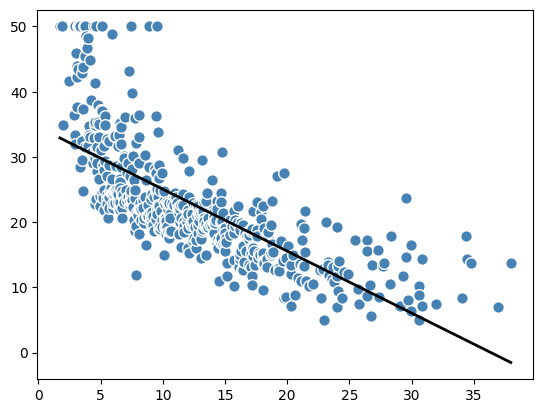

In [61]:
X=boston_df[['LSTAT']].values
y=boston_df[['Price']].values

linear=LinearRegression()
linear.fit(X,y)
sort_idx = X.flatten().argsort()
lin_regplot(X[sort_idx],y[sort_idx],linear)

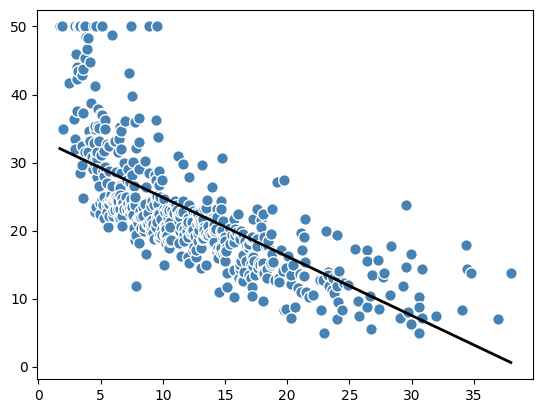

In [62]:
X=boston_df[['LSTAT']].values
y=boston_df[['Price']].values

SGD=SGDRegressor()
SGD.fit(X,y)
sort_idx = X.flatten().argsort()
lin_regplot(X[sort_idx],y[sort_idx],SGD)

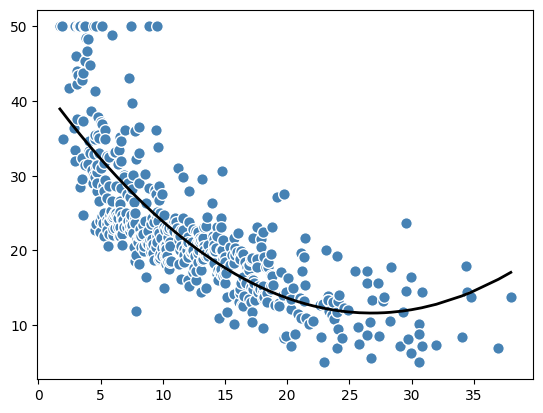

In [63]:
X=boston_df[['LSTAT']].values
y=boston_df[['Price']].values

p_model = Pipeline(memory=None,
                   steps=[('poly',PolynomialFeatures(degree=2,include_bias=False, interaction_only=False,order='C')),
                    ('Linear',LinearRegression(copy_X=True,fit_intercept=True,n_jobs=None))]
                    ,verbose=False)
p_model.fit(X,y)
sort_idx = X.flatten().argsort()
lin_regplot(X[sort_idx],y[sort_idx],p_model)

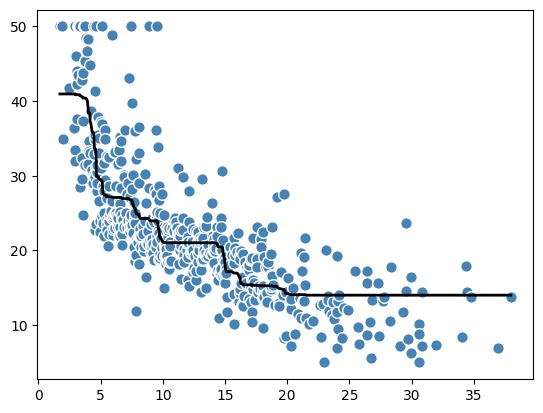

In [64]:
X=boston_df[['LSTAT']].values
y=boston_df[['Price']].values

rf= RandomForestRegressor(max_depth=2)
rf.fit(X,y)
sort_idx = X.flatten().argsort()
lin_regplot(X[sort_idx],y[sort_idx],rf)

---


# 5. Regulation

- 데이터에 너무 과적합되어 모델(W) 이 피팅되었으니, 이를 좀 덜 적합하게(?) 하고, 이후 새로운 데이터에도 일반적으로 들어맞는 모델을 만들어야 한다.
- 이 때, 과적합이 아닌 일반성을 띄게 해주는 기법을 Regularization 이라고 한다.
- Regulation의 목표는 회귀 계수를 0으로 만들거나 작게 만들어서 모델을 일반화 하는 방법이다

![Alt text](image-9.png)

- 특정 가중치가 너무 큰 값을 가지기 때문에 model 의 일반화 성능이 떨어지게 될 것입니다.
- 위 그래프에서 actual function 이 target function 이라고 했을 때, model 이 overfitting 된 것을 알 수 있습니다

![Alt text](image-10.png)
- Regularization 은 이렇게 특정 가중치가 너무 과도하게 커지지 않도록 하여 모델을 위 그래프처럼 만들어줍니다.

> 방법

- L1 (Lasso) 규제
- L2 (Ridge) 규제
- Elastic Net (L1+L2) 규제 

#### 1.L1(Lasso)규제
- L1 Regularizaiton 은 Lasso 라고도 불리며, 기존 Cost function 뒤에 L1 항을 추가해준 것이다.
    
    ![Alt text](image-11.png)
- 이 Cost function J를 실제로는 미분해서 쓰기 때문에, 실제 GD 식에서 위 Cost function 을 접목하면, W를 업데이트 할 때, 계속해서 특정 상수를 빼주는 꼴이 된다.
- W가 계속해서 업데이트 해나갈 때, W의 원소인 어떤 wi 는 0 이 되도록 한다.
- 계속해서 특정상수를 빼나가기 때문이다. 따라서, L1은 영향을 크게 미치는 핵심적인 피처 xi 들만 반영하도록 한다.

#### L2(Ridge)규제
- L2 Regularizaiton 은 Ridge 라고도 불리며, 기존 Cost function 뒤에 L2 항을 추가해준 것이다.

    ![Alt text](image-12.png)
- 위 식을 미분하여 GD 에서 사용하면, 전체적으로 W 값이 작아지도록 한다.

    ![Alt text](image-13.png)
-  기존 GD 보다 Θ 가 일정비율로 더 감소하는 것을 알 수 있다.
- 위의 Lasso 같이 일부 항의 계수를 0으로 만들어버리지는 않고, 전체적인 wi 값의 절대값을 감소시켜 덜 구불구불하게 하는 것이다

---

In [65]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

df=pd.read_csv('../해커톤/new_data.csv',encoding='euc-kr',index_col=0)

X= df[['달러원시가']].values
y= df[['달러원종가']].values

scaler= StandardScaler()
X=scaler.fit_transform(X)
y=scaler.transform(y)


- 선형 회귀를 구해보기 위해서 달러원 시가를 가지고 달러원종가를 예측해보기

In [66]:
from sklearn.model_selection import  train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_squared_error


X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,shuffle=False)

In [67]:
linear_model = LinearRegression()
linear_model.fit(X_train,y_train)
linear_pred = linear_model.predict(X_test)

print(r2_score(linear_pred,y_test))
print(mean_squared_error(linear_pred,y_test))


0.9925342790042648
0.008865751957899301


In [68]:
linear_model.coef_

array([[0.99175241]])

- 다중선형 회귀분석 해보기

In [69]:
df

,달러원종가,달러원시가,CD91,WTI가,달러위안화,달러엔,달러인덱스,유로인덱스,콜금리,코스피종가,BIR,target
0,1150.00,1164.07,2.88,81.64,6.8285,92.47,92.3566,106.23,1.980,1696.140015,2.38,0
1,1140.20,1151.00,2.88,81.47,6.8268,91.58,92.2236,105.82,1.980,1690.619995,2.34,0
2,1129.20,1140.20,2.88,83.25,6.8278,92.38,92.0941,106.11,1.960,1705.319946,2.37,0
3,1138.20,1129.20,2.88,82.69,6.8281,93.45,92.3684,105.84,1.990,1683.449951,2.41,1
4,1128.25,1135.50,2.88,82.91,6.8276,92.68,92.1485,106.18,2.000,1695.260010,2.42,0
...,...,...,...,...,...,...,...,...,...,...,...,...
3313,1325.49,1336.34,3.72,87.42,7.2882,146.58,121.8185,124.19,3.602,2556.879883,2.35,0
3314,1326.15,1326.05,3.73,88.94,7.2910,147.08,121.7721,124.21,3.597,2536.580078,2.34,1
3315,1326.59,1326.72,3.75,88.80,7.2700,147.45,121.5454,124.25,3.592,2534.699951,2.35,0
3316,1329.52,1328.20,3.76,90.67,7.2770,147.47,121.7192,124.19,3.587,2572.889893,2.34,1


In [70]:
import pandas as pd

df=pd.read_csv('../해커톤/new_data.csv',encoding='euc-kr',index_col=0)

X= df.drop(['target','달러원종가','달러원시가'],axis=1)
y= df[['달러원종가']]


# scaler= StandardScaler()
# scaler2= StandardScaler()
# X=scaler.fit_transform(X)
# y=scaler2.fit_transform(y)

In [71]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,shuffle=False)
linear_model = LinearRegression()
linear_model.fit(X_train,y_train)
linear_pred = linear_model.predict(X_test)

print(r2_score(linear_pred,y_test))
print(mean_squared_error(linear_pred,y_test))

-4.505127574181418
32782.32807964118


In [72]:
linear_model.coef_

array([[ 4.12792127e+01, -2.63971798e-02,  5.50752399e+01,
        -4.54986949e-01,  1.68510908e+00, -2.91761273e+00,
        -2.11315171e+01, -7.27437831e-02, -4.15078542e+01]])

In [73]:
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import SelectFromModel
import statsmodels.api as sm
import numpy as np
lr_clf = LinearRegression()

feature = X
target = y

logit = SelectFromModel(LinearRegression())
logit.fit(feature, target)
logit_support = logit.get_support()
lr_feature = feature.loc[:,logit_support].columns.tolist()

In [88]:
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import SGDRegressor

lasso = SelectFromModel(estimator=SGDRegressor(penalty='l2',alpha=0.01)).fit(X, y)
lasso_support = lasso.get_support()
lasso_feature = X.loc[:,lasso_support].columns.tolist()
lasso_feature

['WTI가', '달러엔', '달러인덱스', '유로인덱스']